In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [5]:
url = 'https://raw.githubusercontent.com/vaibhavpras/Coding-Challenge/master/ClusterPlot.csv'
X = pd.read_csv(url) 
  
# Dropping the index column from the data 
X = X.drop('Unnamed: 0', axis = 1) 
  
# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 
  
print(X.head()) 

     V1    V2
0  4.30  0.80
1  3.95  0.80
2  3.95  0.75
3  3.85  0.85
4  4.30  0.80


In [9]:
#determining ideal eps value
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

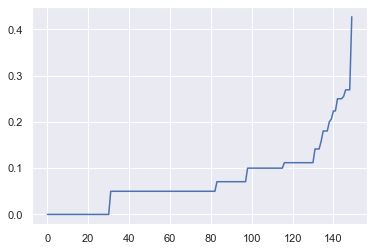

In [10]:
#Next, we sort and plot results.
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [41]:
#ideal eps value is found at the point of maximum curvature which here is, approximately, around 0.3
m = DBSCAN(eps=0.3, min_samples=5)
m.fit(X,3)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [42]:
#The labels_ property contains the list of clusters and their respective points.
clusters = m.labels_

In [49]:
#Then, we map every individual cluster to a color.
colors = ['goldenrod', 'mediumorchid', 'forestgreen']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

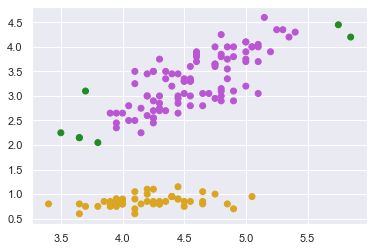

In [50]:
plt.scatter(X['V1'], X['V2'], c=vectorizer(clusters))